In [26]:
import tarfile

with tarfile.open("20newsbydate.tar.gz", "r:gz") as tar:
    tar.extractall()

print("Dataset extracted.")


/tmp/ipython-input-3829101561.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Dataset extracted.


In [27]:
import os
import pandas as pd

data = []
labels = []

base_path = "20news-bydate-train"

for category in ["rec.sport.baseball", "talk.politics.misc"]:
    folder_path = os.path.join(base_path, category)

    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), 'r', encoding="latin-1") as f:
            text = f.read()
            data.append(text)
            labels.append("sport" if "sport" in category else "politics")

df = pd.DataFrame({"text": data, "label": labels})

print("Total documents:", len(df))
df.head()


Total documents: 1062


,text,label
0,From: sepinwal@mail.sas.upenn.edu (Alan Sepinw...,sport
1,From: cubbie@garnet.berkeley.edu ( ...,sport
2,From: tedward@cs.cornell.edu (Edward [Ted] Fis...,sport
3,From: rickert@NeXTwork.Rose-Hulman.Edu (John H...,sport
4,From: kirsch@staff.tc.umn.edu (Dave 'Almost Cu...,sport


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 849
Testing samples: 213


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,1),
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Feature matrix shape:", X_train_tfidf.shape)


Feature matrix shape: (849, 5000)


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("\n", name)
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))



 Naive Bayes
Accuracy: 0.9953
              precision    recall  f1-score   support

    politics       1.00      0.99      0.99        93
       sport       0.99      1.00      1.00       120

    accuracy                           1.00       213
   macro avg       1.00      0.99      1.00       213
weighted avg       1.00      1.00      1.00       213


 Logistic Regression
Accuracy: 0.9859
              precision    recall  f1-score   support

    politics       0.99      0.98      0.98        93
       sport       0.98      0.99      0.99       120

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213


 Linear SVM
Accuracy: 0.9906
              precision    recall  f1-score   support

    politics       0.99      0.99      0.99        93
       sport       0.99      0.99      0.99       120

    accuracy                           0.99       213
   macro avg       0.99     

In [31]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": results.values()
})

results_df


,Model,Accuracy
0,Naive Bayes,0.995305
1,Logistic Regression,0.985915
2,Linear SVM,0.990610


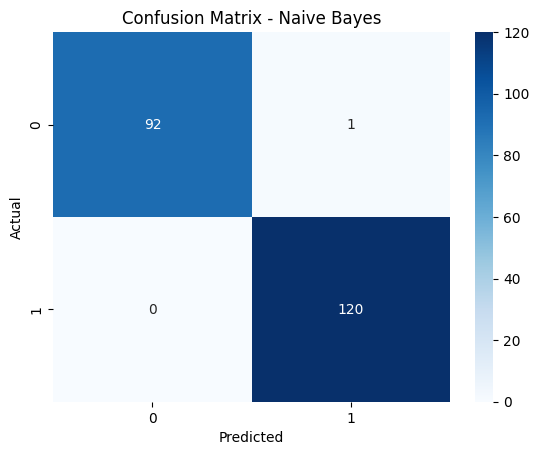

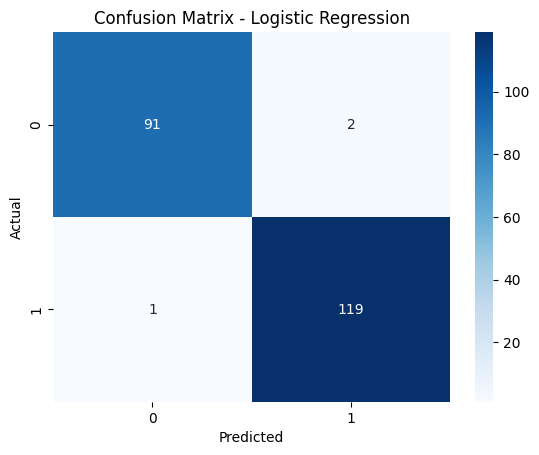

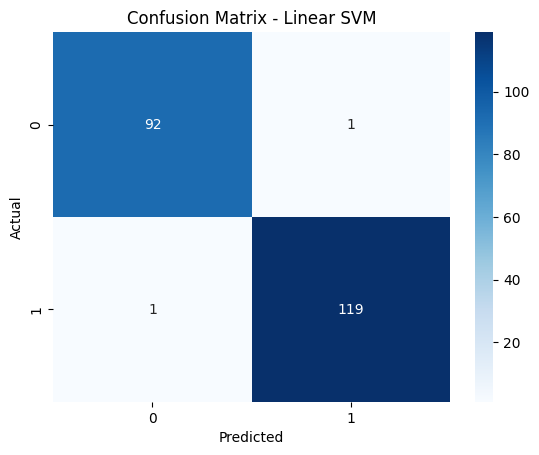

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
